In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras import layers
from sklearn.utils import class_weight

tf.compat.v1.enable_eager_execution()

loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True) 

MNIST

1. MLP

In [2]:
mnist = tf.keras.datasets.mnist

#laden des MNIST Datensatz (Trainingsdaten und Validierungsdaten)
(x_train, y_train), (x_val, y_val) = mnist.load_data()
x_train, x_val = x_train / 255.0, x_val / 255.0

In [3]:
# Bauen eines MLP mit einem Inputlayer, 3 Hidden Layers und einem Output Layer
# Für jeden Pixel der Bilder (28x28) gibt es ein Input Neuron
# für jeden Output, der vorhergesagt werden soll (0-9), gibt es ein Output Neuron

model = tf.keras.models.Sequential([
        layers.Flatten(input_shape=(28, 28)),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(64, activation="relu"),
        layers.Dense(32, activation="relu"),
        layers.Dense(10)])

# Bei der Beispiel-Forward-Berechnung sollte der Tensor in ein
# Numpy-Array umgewandelt werden und der Output in
# die softmax-Funktion gegeben werden,
# da so die Output-Werte normalisiert werden
# (geschieht im Training des Models automatisch)

bsp_preds = tf.nn.softmax(model(x_train[:1]).numpy()).numpy()

# kompiliere das Model
model.compile(optimizer="adam", loss=loss_func, metrics=["accuracy"])

# trainiere das Model auf den Trainingsdaten (10 Epochen)
model.fit(x_train, y_train, epochs=10, batch_size=256, validation_split=0.1, verbose=0)

# bestimme die Genauigkeit des Models anhand der Validierungsdaten
model.evaluate(x_val, y_val, verbose=2)

10000/1 - 2s - loss: 0.0482 - acc: 0.9761


[0.09627766095803526, 0.97609997]

2. CNN

In [4]:
cnn_model = tf.keras.models.Sequential()

x_train, x_val = x_train.reshape(-1, 28, 28, 1), x_val.reshape(-1, 28, 28, 1)

cnn_model.add(layers.Conv2D(32, (3, 3), activation="relu", padding="same", input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation="relu", padding="same"))
cnn_model.add(layers.MaxPooling2D((2, 2)))

# MLP Klassifizierer bauen
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation="sigmoid"))
cnn_model.add(layers.Dense(10))

cnn_model.compile(optimizer="adam", loss=loss_func, metrics=["accuracy"])
cnn_model.fit(x_train, y_train, batch_size=64, validation_split=0.1, epochs=5, verbose=0)

cnn_model.evaluate(x_val, y_val, verbose=2)

10000/1 - 2s - loss: 0.0156 - acc: 0.9891


[0.030290156397875398, 0.9891]

Fashion-MNIST

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

(x_train, y_train), (x_val, y_val) = fashion_mnist.load_data()

x_train, x_val = x_train / 255.0, x_val / 255.0

model.fit(x_train, y_train, epochs=10, batch_size=256, verbose=0)
model.evaluate(x_val, y_val, verbose=2)

cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=5, batch_size=128, verbose=0)
cnn_model.evaluate(x_val.reshape(-1, 28, 28, 1), y_val, verbose=2)

10000/1 - 2s - loss: 0.2712 - acc: 0.8791
10000/1 - 2s - loss: 0.1995 - acc: 0.9128


[0.24748996720910071, 0.91279995]

Spiral data prediction

In [8]:
# lade die Trainings- und Testdaten
train_data = np.genfromtxt("data/spirals.trn.csv", delimiter=",", skip_header=1, dtype=np.str)
val_data = np.genfromtxt("data/spirals.vld.csv", delimiter=",", skip_header=1, dtype=np.str)

# Zeilen, die zur blauen Spirale gehören
blue_train_indices = train_data[:,2] == "blue"
blue_val_indices = val_data[:,2] == "blue"

# Umwandeln der Daten in Floats
x_train = train_data[:, :2].astype(np.float32)
y_train = blue_train_indices.astype(np.int16)

x_val = val_data[:, :2].astype(np.float32)
y_val = blue_val_indices.astype(np.int16)

In [9]:
# baue das MLP
model = tf.keras.models.Sequential()
model.add(layers.Dense(2048, activation="relu", input_shape=(2,))) # 2 Input-Neuronen (für x und y Koordinate)
model.add(layers.GaussianNoise(0.01)) # Verrausche die Daten (Noise)
model.add(layers.Dense(1024, activation="relu"))
model.add(layers.Dropout(0.1)) # Deaktiviere einige Neuronen
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(128, activation="relu"))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(2)) # 2 Output-Neurone (je 1 pro Spirale)

# kompiliere das Model
model.compile(optimizer="adam", loss=loss_func, metrics=["accuracy"])

# trainiere das Model auf den Trainingsdaten
model.fit(x_train, y_train, epochs=500, batch_size=32, verbose=0)
model.evaluate(x_val, y_val, verbose=2)

# erzeuge die Vorhersagen des Models
# (==ob die jeweilige Koordinate zur blauen oder roten Spirale gehört)
preds = np.argmax(model.predict(x_val), axis=1).astype(bool)

30/1 - 0s - loss: 0.0014 - acc: 1.0000


In [11]:
# Ähnliches MLP, hier allerdings mit einem Output-Neuron mit Sigmoid-Aktivierung,
# welches entweder 1 ("blaue Spirale") oder 0 ("rote Spirale") ausgibt

model = tf.keras.models.Sequential()
model.add(layers.Dense(2560, activation='relu', input_shape=(2,)))
model.add(layers.GaussianNoise(0.01)) # add noise (regularization)
model.add(layers.Dense(1280, activation='relu'))
model.add(layers.Dropout(0.1)) # disable some neurons (regularization)
model.add(layers.Dense(640, activation='relu'))
model.add(layers.Dropout(0.1)) # disable some neurons (regularization)
model.add(layers.Dense(80, activation='relu'))
model.add(layers.Dropout(0.1)) # disable some neurons (regularization)
model.add(layers.Dense(1, activation='sigmoid')) # hier stattdessen 1 Output-Neuron (0 == rot, 1 == blau)

# binary_crossentropy als Loss-Funktion, da nur 1 Output-Neuron existiert (2 Klassen)
model.compile(loss='binary_crossentropy', optimizer="adam", metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=32, epochs=500, verbose=0)
model.evaluate(x_val, y_val, verbose=2)

preds = model.predict_classes(x_val).flatten().astype(bool)

30/1 - 0s - loss: 4.7371e-04 - acc: 1.0000


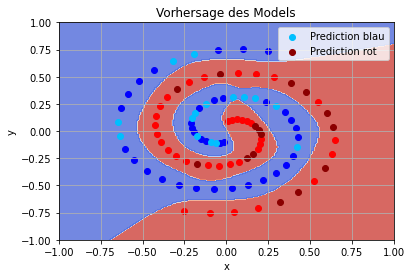

In [12]:
# Plotten der Predictions des MLP
x_train_blue = x_train[blue_train_indices]
x_train_red = x_train[~blue_train_indices]

x_val_blue = x_val[preds]
x_val_red = x_val[~preds]

# Plotten der Results als Contour-Plot
xx = np.linspace(-1, 1, 200)
yy = np.linspace(-1, 1, 200)
gx, gy = np.meshgrid(xx, yy)
Z = model.predict_classes(np.c_[gx.ravel(), gy.ravel()]).flatten().astype(bool)
Z = Z.reshape(gx.shape)
plt.contourf(gx, gy, Z, cmap=plt.cm.coolwarm_r, alpha=0.8)

plt.grid("off")
plt.xlabel("x")
plt.ylabel("y")

plt.scatter(x_train_blue[:, 0], x_train_blue[:, 1], c="blue")
plt.scatter(x_train_red[:, 0], x_train_red[:, 1], c="red")
plt.scatter(x_val_blue[:, 0], x_val_blue[:, 1], c="deepskyblue", label="Prediction blau")
plt.scatter(x_val_red[:, 0], x_val_red[:, 1], c="darkred", label="Prediction rot")
plt.legend(loc="best")
plt.title("Vorhersage des Models")
plt.show()

Gene expression analysis using single-cell RNASeq data

In [14]:
# lade die Trainings- und Testdaten

# data taken from https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE158699 (not in repo)

data = pd.read_csv("data/GSE158699_gene_TMM_counts.csv", delimiter=",")
data = data.drop(data.columns[0], axis=1).astype(np.float32) # Gene-IDs entfernen

metadata = pd.read_csv("data/GSE158699_phenotype_data_9.20.20.csv", delimiter=",",
                       usecols=["GEO_id", "SmokCigNow", "ATS_PackYears" ,"data_split"]).dropna()

metadata.SmokCigNow = metadata.SmokCigNow.astype(np.int16) # Umwandeln in Ints (1 oder 0)

# Rausfiltern der IDs (Spalten), die nicht in beiden Files vorhanden sind
genes_in_metadata = set(metadata.GEO_id) 
rows_to_discard = [i for i, gene in enumerate(data.columns) if gene not in genes_in_metadata]

# Entfernen der Spalten, die nur im ersten Datensatz vorliegen
data = data.drop(data.columns[rows_to_discard], axis=1)

# Aufteilen der Daten in Trainings,- Validierungs,- und Testdaten
# Vorhesage nach Merkmal "SmokSigNow"
train = metadata.loc[metadata["data_split"] == "training", ["GEO_id", "SmokCigNow"]]
validation = metadata.loc[metadata["data_split"] == "validation", ["GEO_id", "SmokCigNow"]]
test = metadata.loc[metadata["data_split"] == "test", ["GEO_id", "SmokCigNow"]]

x_train = data.loc[:, train.GEO_id].T.to_numpy()
y_train = train.SmokCigNow.values

x_val = data.loc[:, validation.GEO_id].T.to_numpy()
y_val = validation.SmokCigNow.values

x_test = data.loc[:, test.GEO_id].T.to_numpy()
y_test = test.SmokCigNow.values

In [15]:
class FeatureSelectionLayer(layers.Layer):
    # Custom Layer (1-zu-1 Verknüpfung zum nächsten Layer)
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)
    
    def build(self, input_shape):
        self.kernel = self.add_weight("kernel", shape=(int(input_shape[-1]),))
    
    def call(self, inputs):
        return tf.multiply(inputs, self.kernel)

In [17]:
model = tf.keras.models.Sequential()
model.add(layers.InputLayer(input_shape=(18487,)))
model.add(layers.GaussianNoise(0.1))
model.add(FeatureSelectionLayer(256)) # Feature Selection Layer (1-zu-1 Verknüpfung zum nächsten Layer)
model.add(layers.Dropout(0.1)) # Ausschalten einiger Neuronen (Regularization)
model.add(FeatureSelectionLayer(64))
model.add(layers.Dropout(0.1)) 
model.add(FeatureSelectionLayer(8))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation="sigmoid"))

# Balancieren der Trainings(klassen)daten
class_weights = dict(enumerate(class_weight.compute_class_weight
                ("balanced", classes=np.unique(y_train), y=y_train)))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.fit(x_train, y_train, batch_size=64, validation_data=(x_val, y_val), 
          epochs=20, verbose=0, class_weight=class_weights)
model.evaluate(x_test, y_test, verbose=2)

513/1 - 0s - loss: 0.2257 - acc: 0.8558


[0.37251251549632464, 0.8557505]